In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import datasets, preprocessing, metrics
import sklearn as sk
import math 
import pprint
from scipy.stats import normaltest
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm
from sklearn.metrics import r2_score, mean_squared_error
import pickle

In [185]:
df = pd.read_csv('proffData.csv')
df.head(20)

,amountemployes,beforetaxes
0,1855,65285
1,1464,-146000
2,36,4333
3,1386,1906692
4,2317,2691000
5,20,11
6,2340,754384
7,22150,56771000
8,87,46810
9,59,4469


In [186]:
#df1 = pd.read_csv('task2.2.csv')
#del df1[df1.columns[0]]
#df1.head(1)

In [187]:
#final = pd.concat([df1, df], axis=1)

In [188]:
#final.head(1)

In [189]:
#new_df = final.loc[:, ['name','city', 'amountemployes','beforetaxes' ]]

In [190]:
#new_df['new_revenue'] = 0

In [191]:
#new_df

In [192]:
#del new_df[new_df.columns[0]]
#del new_df[new_df.columns[0]]

In [193]:
#new_df.head()

In [194]:
#X = new_df['beforetaxes'].values.reshape(-1, 1)
#y = new_df['amountemployes'].values.reshape(-1, 1)

#Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
#reg = LinearRegression()
#reg.fit(X_train, y_train)


# Make predictions
#y_pred = reg.predict(X_test)


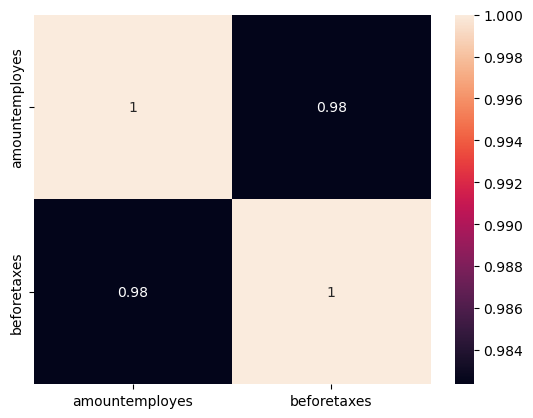

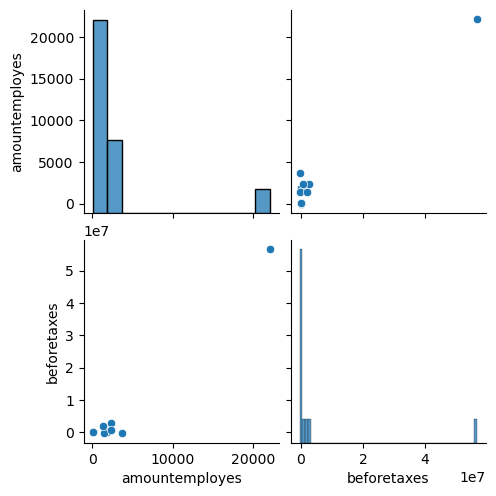

R-squared score: -189.34246054835666
Mean squared error: 23565363872363.58
Predicted revenue for next year: 4970220.935824927


In [195]:
X = df[['beforetaxes']]
y = df['beforetaxes'].shift(-1)
X = X[:-1]
y = y[:-1]
corr_matrix = new_df.corr()
sns.heatmap(corr_matrix, annot=True)
sns.pairplot(new_df[['amountemployes', 'beforetaxes']])
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('R-squared score:', r2)
print('Mean squared error:', mse)

X_new = np.array([[df['beforetaxes'].iloc[-1]]])
X_new = pd.DataFrame(X_new, columns=['beforetaxes'])
y_new = model.predict(X_new)
print('Predicted revenue for next year:', y_new[0])


In [196]:
X = df['amountemployes'].values.reshape(-1, 1)
y = df['beforetaxes'].values.reshape(-1, 1)

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.15) 

In [198]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(16, 1)
(16, 1)
(3, 1)
(3, 1)


In [199]:
myreg = LinearRegression()

In [200]:
myreg.fit(X_train, y_train)

LinearRegression()

In [201]:
a = myreg.coef_
b = myreg.intercept_

In [202]:
y_predicted = myreg.predict(X_test)

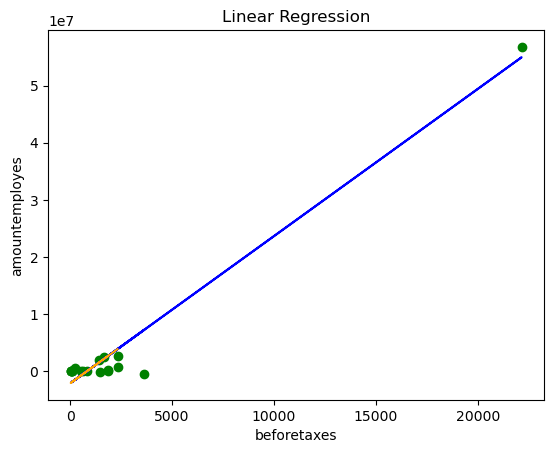

In [203]:
plt.title('Linear Regression')
plt.scatter(X, y, color='green')
plt.plot(X_train, a*X_train + b, color='blue')
plt.plot(X_test, y_predicted, color='orange')
plt.xlabel('beforetaxes')
plt.ylabel('amountemployes')
plt.show()

In [204]:
R2 = myreg.score(X, y)
R2

0.9610171918788336

In [205]:
def categorize_company(row):
    num_employees = row["amountemployes"]
    if num_employees < 50:
        return "Small"
    elif num_employees >= 50 and num_employees < 250 :
        return "Middle"
    elif num_employees >= 250:
        return "Large"
    else:
        return "Uncategorized"

df["company_size"] = df.apply(categorize_company, axis=1)

In [206]:
df.head(5)

,amountemployes,beforetaxes,company_size
0,1855,65285,Large
1,1464,-146000,Large
2,36,4333,Small
3,1386,1906692,Large
4,2317,2691000,Large


In [207]:
df3 = pd.read_csv('finaldatasetwithNames.csv')
df3.head(2)

,student,company,name,address,zipcode,city,postal_code,country_code,place_name,state_name,state_code,county_name,county_code,latitude,longitude
0,Jason Brown,Dynatest A/S,A/S DYNATEST ENGINEERING,Generatorvej 21,2730,Herlev,2730,DK,Herlev,Capital Region,17,Herlev Kommune,163,55.7338,12.4278
1,Jacob Stein,"Eriksholm Research Centre, Oticon",PROPOLIS RESEARCH CENTRE A/S,Lille Veksøvej 11,3670,Veksø Sjælland,3670,DK,Veksø Sjælland,Capital Region,17,Egedal Kommune,240,55.7576,12.2386


In [208]:
df4 = df3.loc[:, ['latitude', 'longitude']]
df5 = df4.iloc[:19]
df5.head(5)

,latitude,longitude
0,55.7338,12.4278
1,55.7576,12.2386
2,55.7333,12.3566
3,55.7333,12.3566
4,55.7333,12.3566


In [209]:
finaldata = pd.concat([df, df5], axis=1)

In [210]:
finaldata.head(18)

,amountemployes,beforetaxes,company_size,latitude,longitude
0,1855,65285,Large,55.7338,12.4278
1,1464,-146000,Large,55.7576,12.2386
2,36,4333,Small,55.7333,12.3566
3,1386,1906692,Large,55.7333,12.3566
4,2317,2691000,Large,55.7333,12.3566
5,20,11,Small,55.7571,12.4558
6,2340,754384,Large,55.7072,12.5720
7,22150,56771000,Large,55.7333,12.3566
8,87,46810,Middle,55.7333,12.3566
9,59,4469,Middle,55.7333,12.3566


In [211]:
#new_df1 = finaldata.loc[:, ['name','city', 'amountemployes','beforetaxes','latitude', 'longitude']]
#new_df1.drop('name', axis=1)
#new_df1.head(20)

In [172]:
X = finaldata['latitude'].values.reshape(-1, 1)
y = finaldata['longitude'].values.reshape(-1, 1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
